In [10]:
import pandas as pd
from pandas import DataFrame

try:
# Carica il tuo file XLSX
    xlsx_file = 'C:/Users/loris/Desktop/Python Workspace/FirstTryMiller/dataset/richerDataset.xlsx'  # Sostituisci con il percorso del tuo file

# Leggi i dati dal file XLSX e crea un DataFrame
    df: DataFrame = pd.read_excel(xlsx_file)

# Ora hai un DataFrame con tutti i dati dal tuo file XLSX che puoi utilizzare per l'analisi.
except FileNotFoundError as e:
    print("Il file non è stato trovato.")
    print(f"Si è verificato un errore: {e}")                                                          
    
# Rimuovi il record con k_m2 uguale a 0
df = df[df['k_m2'] != 0]
#Rimuovi colonne Porosity tot e SSA tot
df = df.drop(['Porosity_Tot', 'SSA_Tot'], axis=1)
# Resetta gli indici del DataFrame
df.reset_index(drop=True, inplace=True)



k2_max = df['k_m2'].max()
k2_min = df['k_m2'].min()
print(df)



    Conn.Dens.  Porosity     SSA      Ech  Tortuosity          k_m2
0      310.913     0.137   5.065  -25.849      2.0340  1.473350e-12
1      310.913     0.147   5.253  -31.002      2.6650  2.254724e-12
2      310.913     0.131   4.697  -20.047      2.1090  9.543177e-12
3      350.137     0.115   5.583  -50.613      4.1830  9.664920e-13
4      350.137     0.139   7.447 -136.737      2.5950  9.180783e-13
5      350.137     0.115   5.311  -32.907      4.1010  1.435774e-12
6      368.141     0.134   6.990 -115.218      2.7740  4.010302e-13
7      368.141     0.138   7.132 -110.411      2.7790  3.937021e-12
8      368.141     0.116   5.290  -39.748      3.8680  1.933907e-12
9       10.573     0.020   0.791   -3.948      3.1000  3.021802e-13
10      10.573     0.020   0.806   -2.017      2.9000  3.190436e-13
11     458.436     0.273   7.721 -102.424      1.7170  5.516051e-11
12     458.436     0.250   6.870  -76.478      1.3530  3.822390e-11
13     458.436     0.265   7.560  -95.050      1

In [11]:
# Log-Trasformo la colonna k_m2 in base 10
import numpy as np
df['k_m2'] = np.log10(df['k_m2'])
print(df)

    Conn.Dens.  Porosity     SSA      Ech  Tortuosity       k_m2
0      310.913     0.137   5.065  -25.849      2.0340 -11.831694
1      310.913     0.147   5.253  -31.002      2.6650 -11.646907
2      310.913     0.131   4.697  -20.047      2.1090 -11.020307
3      350.137     0.115   5.583  -50.613      4.1830 -12.014802
4      350.137     0.139   7.447 -136.737      2.5950 -12.037120
5      350.137     0.115   5.311  -32.907      4.1010 -11.842914
6      368.141     0.134   6.990 -115.218      2.7740 -12.396823
7      368.141     0.138   7.132 -110.411      2.7790 -11.404832
8      368.141     0.116   5.290  -39.748      3.8680 -11.713564
9       10.573     0.020   0.791   -3.948      3.1000 -12.519734
10      10.573     0.020   0.806   -2.017      2.9000 -12.496150
11     458.436     0.273   7.721 -102.424      1.7170 -10.258372
12     458.436     0.250   6.870  -76.478      1.3530 -10.417665
13     458.436     0.265   7.560  -95.050      1.5730 -10.277698
14     607.796     0.250 

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(df)
# Crea un nuovo DataFrame con i dati scalati e riassegna le colonne non scalate
#df_scaled = pd.DataFrame(scaled_data, columns=columns_to_scale)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)

# Stampa il DataFrame scalato
print("DataFrame scalato:")
print(df_scaled)

DataFrame scalato:
    Conn.Dens.  Porosity       SSA       Ech  Tortuosity      k_m2
0     0.502894  0.422383  0.449469  0.933953    0.222507  0.476669
1     0.502894  0.458484  0.469240  0.919672    0.424816  0.526208
2     0.502894  0.400722  0.410769  0.950032    0.246553  0.694191
3     0.568572  0.342960  0.503944  0.865322    0.911510  0.427581
4     0.568572  0.429603  0.699968  0.626641    0.402373  0.421597
5     0.568572  0.342960  0.475339  0.914392    0.885220  0.473661
6     0.598718  0.411552  0.651909  0.686278    0.459763  0.325166
7     0.598718  0.425993  0.666842  0.699600    0.461366  0.591105
8     0.598718  0.346570  0.473131  0.895433    0.810516  0.508338
9     0.000000  0.000000  0.000000  0.994648    0.564283  0.292215
10    0.000000  0.000000  0.001577  1.000000    0.500160  0.298538
11    0.749909  0.913357  0.728783  0.721735    0.120872  0.898455
12    0.749909  0.830325  0.639289  0.793641    0.004168  0.855751
13    0.749909  0.884477  0.711852  0.74217

In [13]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# Trova la migliore combinazione di random_state per train_test_split e XGBoost
best_combination = {'split_random_state': None, 'estimator_random_state': None}
best_score = -float('inf')

for split_random_state in range(0, 100):
    X = df_scaled.drop('k_m2', axis=1)
    y = df_scaled['k_m2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=split_random_state)
    
    for estimator_random_state in range(0, 100):
        model = XGBRegressor(random_state=estimator_random_state)
        model.fit(X_train, y_train)
        
        y_pred = model.predict(X_test)
        score = r2_score(y_test, y_pred)
        
        if score > best_score:
            best_score = score
            best_combination['split_random_state'] = split_random_state
            best_combination['estimator_random_state'] = estimator_random_state

print(f"Best combination found: {best_combination} with R^2 score: {best_score}")


Best combination found: {'split_random_state': 50, 'estimator_random_state': 0} with R^2 score: 0.9448467726050759


In [15]:
best_random_state_split = None
best_score_split = -float('inf')

for random_state in range(0, 100):
    X = df_scaled.drop('k_m2', axis=1)
    y = df_scaled['k_m2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    model = XGBRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_split:
        best_score_split = score
        best_random_state_split = random_state

print(f"Best random_state for train_test_split: {best_random_state_split} with R^2 score: {best_score_split}")


Best random_state for train_test_split: 50 with R^2 score: 0.9448467726050759


In [16]:
best_random_state_estimator = None
best_score_estimator = -float('inf')

for random_state in range(0, 100):
    X = df_scaled.drop('k_m2', axis=1)
    y = df_scaled['k_m2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)
    
    model = XGBRegressor(random_state=random_state)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    
    if score > best_score_estimator:
        best_score_estimator = score
        best_random_state_estimator = random_state

print(f"Best random_state for XGBoost: {best_random_state_estimator} with R^2 score: {best_score_estimator}")


Best random_state for XGBoost: 0 with R^2 score: 0.9448467726050759


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
import logging
from tqdm.notebook import tqdm


# Configura il logger
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()


param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


X = df_scaled.drop('k_m2', axis=1)
y = df_scaled['k_m2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=best_random_state_split)

model = XGBRegressor(random_state=best_random_state_split)


# Personalizza GridSearchCV per utilizzare tqdm
class TQDMProgressBar(tqdm):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self._logger = logger

    def update_to(self, current, total):
        self.n = current
        self.total = total
        self._logger.info(f'Progress: {self.n}/{self.total} ({self.n/self.total:.2%})')
        self.refresh()

progress_bar = TQDMProgressBar(total=len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth']) * len(param_grid['subsample']) * len(param_grid['colsample_bytree']), desc="Hyperparameter tuning")



grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Best parameters found: {grid_search.best_params_}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")


Hyperparameter tuning:   0%|          | 0/243 [00:00<?, ?it/s]

Best parameters found: {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
R^2 score: 0.8586562410218083
MSE: 0.005833784127949277
MAE: 0.060811828282189805


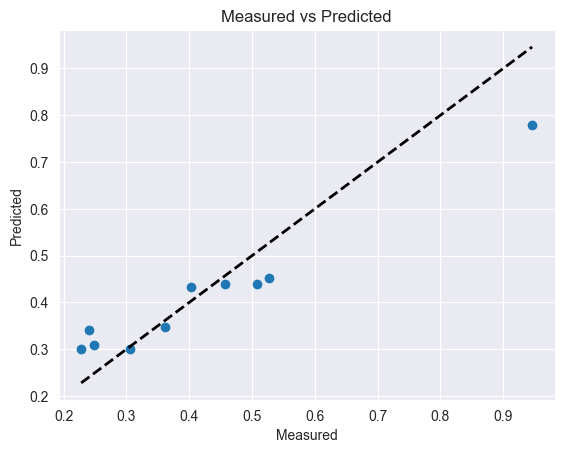

In [20]:
# Vorrei visualizzare il grafico con la retta bisettrice per valutare la bontà del modello
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted')
plt.show()